# BUSINESS UNDERSTANDING

## Overivew

SyriaTel, a leading telecommunications company, has been experiencing customer churn—customers stopping their service or switching to competitors. Customer churn is a critical issue as acquiring new customers is often more expensive than retaining existing ones. Thus, predicting which customers are likely to churn soon and implementing strategies to retain them can significantly impact the company's revenue and growth.

## Business Problem

The primary stakeholder for this project is the Chief Marketing Officer (CMO) of SyriaTel. The CMO is responsible for overseeing the company's marketing strategies and customer retention efforts. By identifying patterns of customer churn, the CMO can implement targeted marketing campaigns and retention strategies to minimize churn rates and enhance customer loyalty.

## Objectives

1. Explain causes of customer churn rate.
2. Predict customer churn rate.
3. Reduce customer churn rate.

## DATA UNDERSTANDING

For this project the dataset we will be using is the SyriaTel Customer Chrun. This data set includes only 1 csv file

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import KMeansSMOTE
from sklearn.utils import resample
from imblearn.over_sampling import SMOTENC
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from scipy.sparse import vstack
import xgboost as xgb
from datetime import datetime

In [2]:
#Loading the data
df = pd.read_csv(r"C:\Users\willi\OneDrive\Documents\GitHub\DSC-Phase-3-Project-Syriel\bigml_59c28831336c6604c800002a.csv")


In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
#Understanding the dataset by getting the names of all columns and data types
print("Column names for DataFrame 1:")
print(list(df.columns))

print("\nDataFrame 1 Information:")
df.info()


Column names for DataFrame 1:
['state', 'account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']

DataFrame 1 Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   n

## Data Preparation

In [5]:
# Next is to check for any missing values in the datasets
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

As you can see we have no missing values so there's no need to clean for missing values.

In [6]:
# Check for any duplicates
duplicates = df.duplicated()

num_duplicates = duplicates.sum()

print("Number of duplicates:", num_duplicates)

Number of duplicates: 0


We have no duplicates which makes our data cleaning process much simpler

In [7]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

### Visualization

Before modelling we need to understand our data and to do this we can use visualizations. To try and spot trends and answer some of our objectives even before modelling.

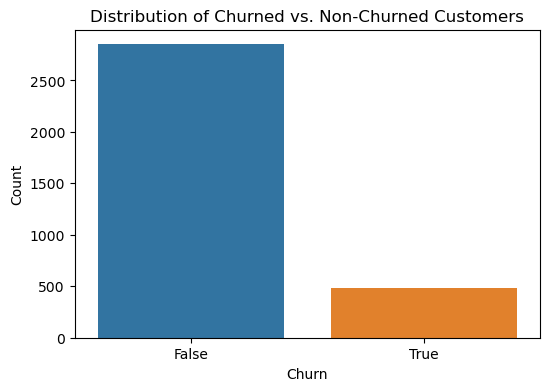

In [8]:
# Create a bar plot for churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df)
plt.title('Distribution of Churned vs. Non-Churned Customers')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'])
plt.show()

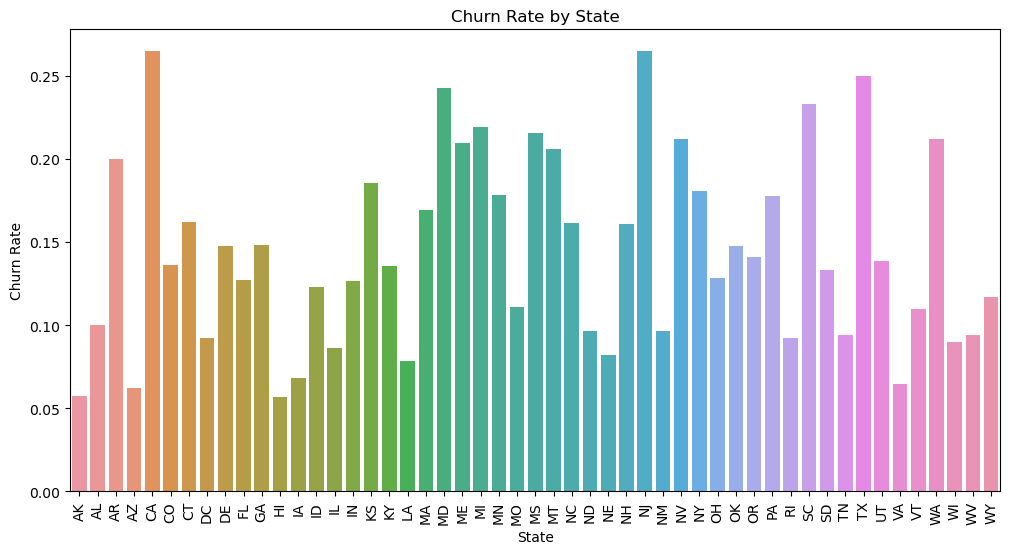

In [9]:
churn_by_state = df.groupby('state')['churn'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='churn', data=churn_by_state)
plt.title('Churn Rate by State')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.xticks(rotation=90)
plt.show()


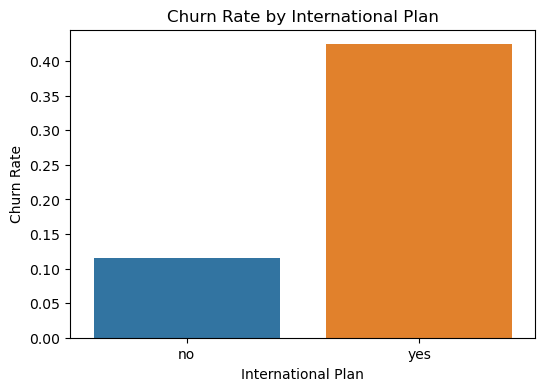

In [10]:
churn_by_international_plan = df.groupby('international plan')['churn'].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(x='international plan', y='churn', data=churn_by_international_plan)
plt.title('Churn Rate by International Plan')
plt.xlabel('International Plan')
plt.ylabel('Churn Rate')
plt.show()


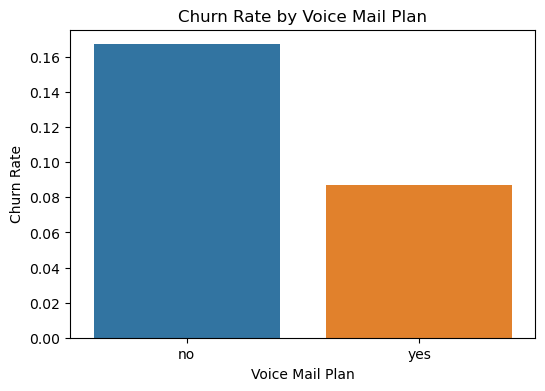

In [11]:
churn_by_voice_mail_plan = df.groupby('voice mail plan')['churn'].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(x='voice mail plan', y='churn', data=churn_by_voice_mail_plan)
plt.title('Churn Rate by Voice Mail Plan')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Churn Rate')
plt.show()


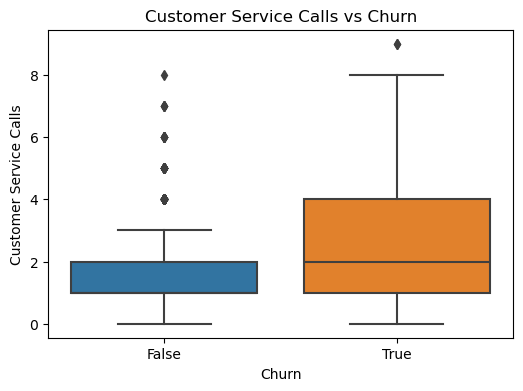

In [12]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='churn', y='customer service calls', data=df)
plt.title('Customer Service Calls vs Churn')
plt.xlabel('Churn')
plt.ylabel('Customer Service Calls')
plt.show()


c:\Users\willi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\willi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


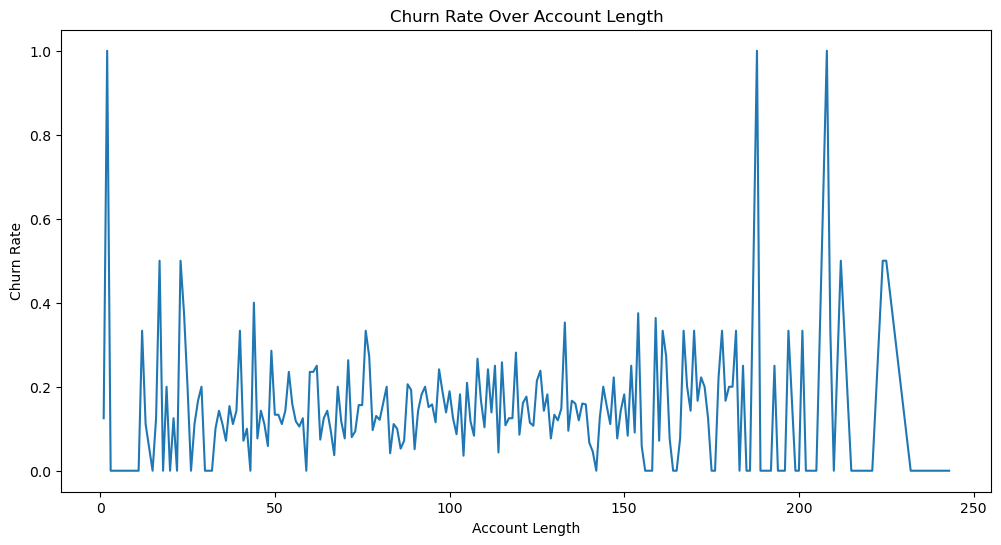

In [13]:
churn_by_account_length = df.groupby('account length')['churn'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='account length', y='churn', data=churn_by_account_length)
plt.title('Churn Rate Over Account Length')
plt.xlabel('Account Length')
plt.ylabel('Churn Rate')
plt.show()
